通过Spark读取northwind中的Orders.csv数据，然后构建对应的表并使用SQL以运输国家进行汇总统计。
将统计后的数据转化为字典，使用WordCloud进行展示。

In [1]:
from pyspark.sql import SparkSession 
spark=SparkSession.builder.appName('spark').getOrCreate()

In [2]:
import matplotlib.pyplot as plt
import os
from wordcloud import WordCloud, ImageColorGenerator

In [3]:
df = spark.read.csv('./Orders.csv',header=True,inferSchema=True)

In [4]:
df.createTempView("orders")

In [5]:
country=spark.sql('SELECT ShipCountry , count(ShipCountry) num FROM  Orders  GROUP BY ShipCountry')

In [6]:
country.show()

+-----------+---+
|ShipCountry|num|
+-----------+---+
|     Sweden| 37|
|    Germany|122|
|     France| 77|
|  Argentina| 16|
|    Belgium| 19|
|    Finland| 22|
|      Italy| 28|
|     Norway|  6|
|      Spain| 23|
|    Denmark| 18|
|    Ireland| 19|
|  Venezuela| 46|
|        USA|122|
|     Mexico| 28|
|         UK| 56|
|Switzerland| 18|
|     Canada| 30|
|     Brazil| 83|
|     Poland|  7|
|   Portugal| 13|
+-----------+---+
only showing top 20 rows



In [7]:
country_pd=country.toPandas()

In [8]:
country_list=country_pd.ShipCountry
num_list=country_pd.num

In [9]:
dic=dict(zip(country_list,num_list))

In [10]:
dic

{u'Argentina': 16L,
 u'Austria': 40L,
 u'Belgium': 19L,
 u'Brazil': 83L,
 u'Canada': 30L,
 u'Denmark': 18L,
 u'Finland': 22L,
 u'France': 77L,
 u'Germany': 122L,
 u'Ireland': 19L,
 u'Italy': 28L,
 u'Mexico': 28L,
 u'Norway': 6L,
 u'Poland': 7L,
 u'Portugal': 13L,
 u'Spain': 23L,
 u'Sweden': 37L,
 u'Switzerland': 18L,
 u'UK': 56L,
 u'USA': 122L,
 u'Venezuela': 46L}

In [11]:
wc = WordCloud(background_color="red", repeat=True)

In [12]:
wc.generate_from_frequencies(dic)

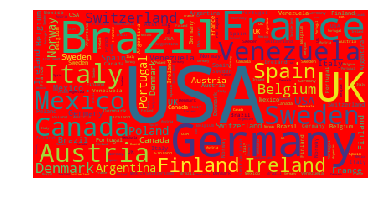

In [13]:
plt.imshow(wc)
plt.axis("off")  # 不显示坐标轴
plt.show()

In [14]:
wc.to_file('spark.png')